    nodes  interval  blocksize   SBR  throughput
46      1      5000     535000  0.00      117.13
49      1     10000     535000  0.00       58.56
9       1     20000     535000  0.00       29.28
21      1     30000     535000  0.00       19.52
25      1     40000     535000  0.00       14.64
42      1     50000     535000  0.00       11.71
15      1     80000     535000  0.00        7.32
56      1    100000     535000  0.00        5.86
44      2      5000     535000  0.03       97.21
16      2     10000     535000  0.01       53.54
36      2     20000     535000  0.01       26.58
30      2     30000     535000  0.00       17.84
26      2     40000     535000  0.00       13.44
37      2     50000     535000  0.00       10.62
41      2     80000     535000  0.00        6.53
58      2    100000     535000  0.00        5.22
59      4      5000     535000  0.08      105.53
7       4     10000     535000  0.02       50.61
54      4     20000     535000  0.02       27.66
61      4     30000 

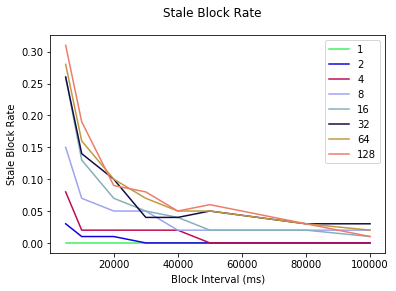

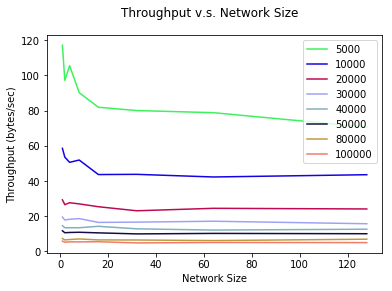

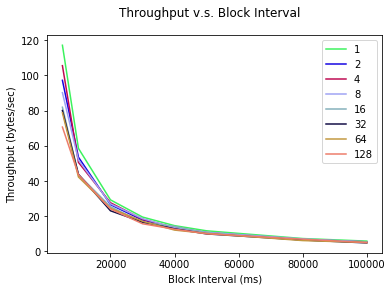

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os

DATA = "./data/data.csv"
df = pd.read_csv(DATA)
df = df.sort_values(['nodes', 'interval'])
print(df)

netsizes = list(df["nodes"].unique())
intervals = list(df["interval"].unique())
#repeats = df["Run Index"].unique()
repeats = [1]
number_of_colors = max(len(netsizes), len(intervals))

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]

# plot Stale Block Rate
fig, ax = plt.subplots()
fig.suptitle("Stale Block Rate")
for size in netsizes:
    color = colors[netsizes.index(size)]
    for run in repeats:
        subset = df[df['nodes'] == size]
        subset.plot(x="interval", y="SBR", ax=ax, label=str(size), color=color)
ax.set(xlabel="Block Interval (ms)", ylabel="Stale Block Rate")
fig = ax.get_figure()
fig.savefig("/Users/amiecorso/Desktop/SBR.pdf")

# plot throughput as a function of network size
fig, ax = plt.subplots()
fig.suptitle("Throughput v.s. Network Size")
for interval in intervals:
    color = colors[intervals.index(interval)]
    for run in repeats:
        subset = df[df['interval'] == interval]
        subset.plot(x="nodes", y="throughput", ax=ax, label=str(interval), color=color)
ax.set(xlabel="Network Size", ylabel="Throughput (bytes/sec)")
fig = ax.get_figure()
fig.savefig("/Users/amiecorso/Desktop/through_vs_netsize.pdf")

# plot Throughput as a function of block interval
fig, ax = plt.subplots()
fig.suptitle("Throughput v.s. Block Interval")
for size in netsizes:
    color = colors[netsizes.index(size)]
    for run in repeats:
        subset = df[df['nodes'] == size]
        subset.plot(x="interval", y="throughput", ax=ax, label=str(size), color=color)
ax.set(xlabel="Block Interval (ms)", ylabel="Throughput (bytes/sec)")
fig = ax.get_figure()
fig.savefig("/Users/amiecorso/Desktop/through_vs_interval.pdf")


plt.show()
